In [27]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

In [28]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
None


In [29]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [ ]:
filenames = []

for file in os.listdir('/kaggle/input/fashion-product-images-small/images'):
    filenames.append(os.path.join('/kaggle/input/fashion-product-images-small/images',file))
    
from tqdm.auto import tqdm

# print(len(filenames))

# image.load_img(filenames[0],target_size=(224,224))

feature_list = []

for file in tqdm(filenames,position=0, leave=True):
    feature_list.append(extract_features(file,model))

pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))


In [30]:
emb=pickle.load(open('/kaggle/input/embeddings-pkl/embeddings.pkl','rb'))
fil=pickle.load(open('/kaggle/input/filenames-pkl/filenames.pkl','rb'))

In [42]:
img_path='/kaggle/input/jerseyy/jersey.jpg'
features=extract_features(img_path,model)   

1/1 [==============================] - 0s 126ms/step


In [38]:
from sklearn.neighbors import NearestNeighbors

def extractsim(n):
    neighbors=NearestNeighbors(n_neighbors=n,algorithm='brute',metric='euclidean')
    return neighbors;

final=extractsim(7)
final.fit(emb)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=7)

In [43]:
dist,ind = final.kneighbors([features])

print(ind.shape)

(1, 7)


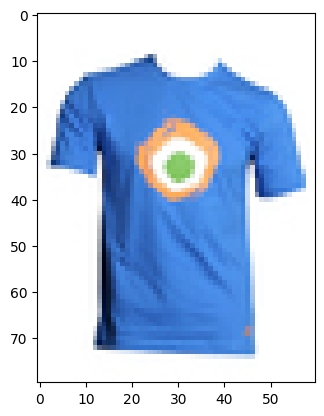

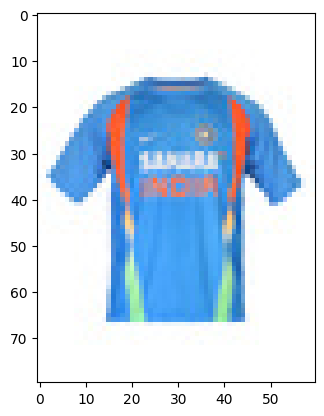

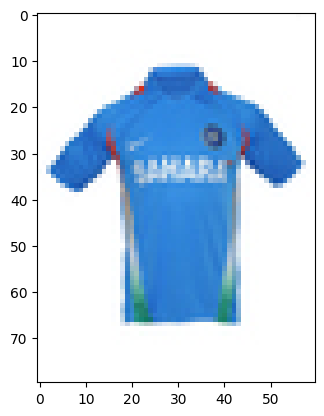

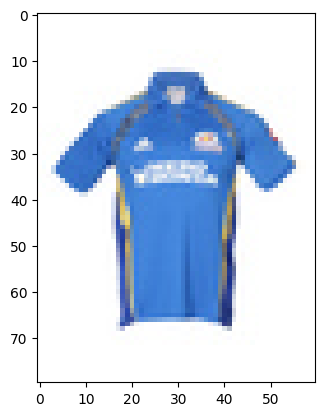

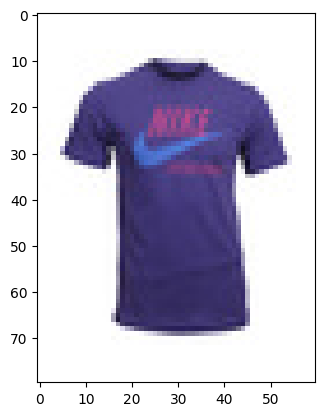

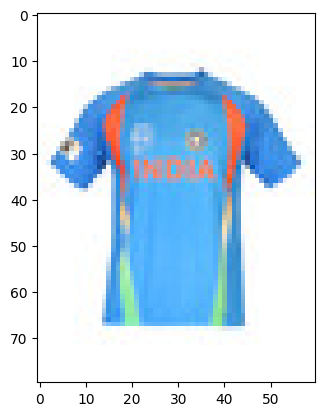

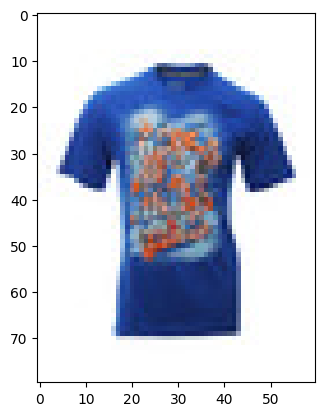

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in ind[0]:
    img=mpimg.imread(fil[i])
    plt.figure()
    plt.imshow(img)
#     cv2.waitkey(0)